# Computational Social Science Project #3 

**Enter your Name:**Taylor Galdi

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# look at the inspections data
chicago_inspections_2011_to_2013.tail()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
17672,1393258,2013-12-17,CIAO BELLA CAFE,CIAO BELLA CAFE,2232690,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,Canvass,Pass,42.005587,-87.661077,"(42.00558686485114, -87.66107732040031)",Restaurant,0,0,6,1,0,1,0,2,6,0.452055,0,2232690-20130327,2232690.0,378808.0,"CIAO BELLA CAFE, INC.",CIAO BELLA CAFE,6800-6806 N SHERIDAN RD,CHICAGO,IL,60626.0,49.0,36.0,49-36,24.0,1006.0,Retail Food Establishment,735,Preparation of Food and Dining on Premise With...,2232690.0,ISSUE,2013-03-27,2015-04-15,AAI,42.005587,-87.661077,2013-03-27,2015-04-15,0.726027,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,25.370000,7.963333,0.776667,10.537839,1.376266,21.726951,0
17673,1395218,2013-12-31,Christian Fields Style Bar,NaN,2002599,Restaurant,Risk 2 (Medium),6550 S COTTAGE GROVE AVE,CHICAGO,IL,60637.0,Canvass,Pass,41.775275,-87.605963,"(41.77527503998271, -87.605963353554)",Restaurant,0,0,4,1,0,0,0,1,4,1.200000,0,2002599-20130716,2259935.0,315535.0,CHRISTIAN FIELDS INC.,CHRISTIAN FIELDS STYLE BAR,6550 S COTTAGE GROVE AVE 1ST,CHICAGO,IL,60637.0,20.0,18.0,20-18,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2002599.0,RENEW,2013-07-16,2015-07-15,AAI,41.775275,-87.605963,2009-11-18,2017-07-15,4.120548,0,0,0,0,0,1,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,56.680038,19.736283,32.355622,0
17674,1395224,2013-12-31,W CHICAGO - LAKESHORE,W CHICAGO,2189458,Restaurant,Risk 1 (High),644 N LAKE SHORE DR,CHICAGO,IL,60611.0,Canvass,Pass w/ Conditions,41.893871,-87.615275,"(41.89387134779289, -87.61527477728374)",Restaurant,3,3,5,0,0,0,0,0,0,2.000000,1,2189458-20130213,2189458.0,375962.0,CHSP TRS LAKESHORE LLC,W CHICAGO-LAKESHORE,644 N LAKE SHORE DR 1-32,CHICAGO,IL,60611.0,42.0,63.0,42-63,18.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2189458.0,ISSUE,2013-02-13,2015-02-15,AAI,41.893871,-87.615275,2013-02-13,2019-02-15,0.879452,0,0,0,0,0,0,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,10.937753,0.000002,19.213021,1
17675,1441493,2012-05-18,ADVOCATE ILLINOIS MASONIC MEDICAL CENTER,COURTYARD CAFE,1142007,Restaurant,Risk 1 (High),836 W WELLINGTON AVE,CHICAGO,IL,60657.0,Canvass,Pass,41.936450,-87.650552,"(41.93645016758182, -87.65055245204128)",Restaurant,0,0,3,1,0,0,0,0,3,0.000000,0,1142007-20110216,2071165.0,63145.0,ADVOCATE NORTH SIDE HEALTH NETWORK,ADVOCATE ILLINOIS MASONIC MEDICAL CENTER,836 W WELLINGTON AVE # 1,CHICAGO,IL,60657.0,44.0,14.0,44-14,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1142007.0,RENEW,2011-02-16,2013-02-15,AAI,41.936450,-87.650552,2002-03-20,2019-02-15,10.169863,0,0,0,0,0,0,0,0,0,0,0,0,0.000383,72.946667,10.143333,0.430000,40.972732,4.839867,20.946616,0
17676,1493801,2013-02-13,SODEXHO,SODEXHO,20432,Restaurant,Risk 1 (High),230 S LA SALLE ST,CHICAGO,IL,60604.0,Canvass,Pass,41.878538,-87.632414,"(41.878538291685196, -87.63241426118783)",Restaurant,0,0,4,1,0,0,0,0,4,0.000000,0,20432-20110216,2071169.0,63300.0,"SODEXO MANAGEMENT, INC.",SODEXO,230 

In [5]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [6]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [7]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

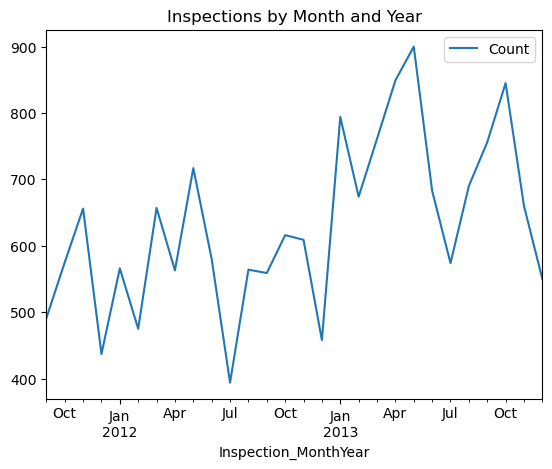

In [8]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

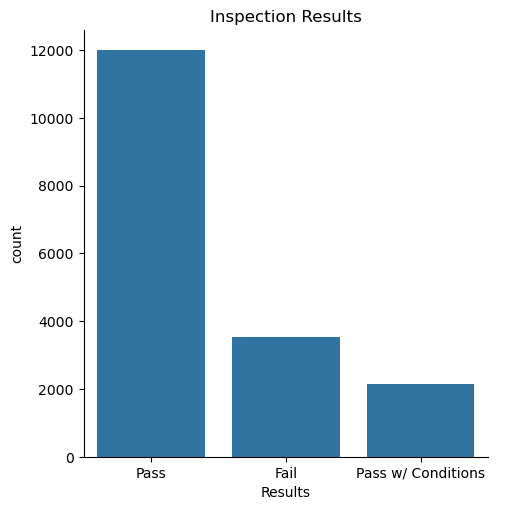

In [9]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

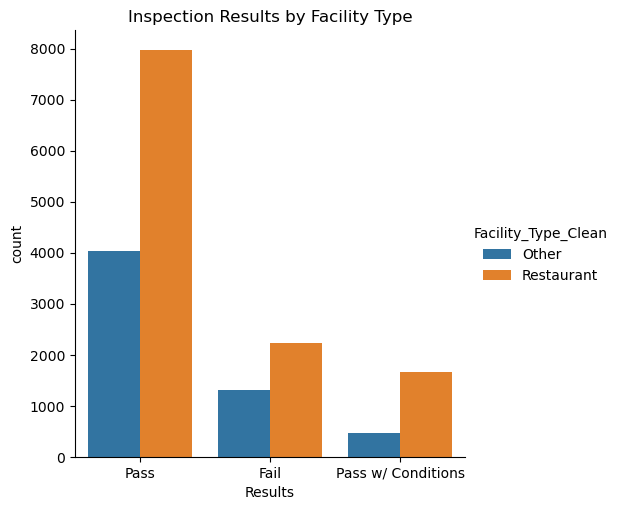

In [10]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

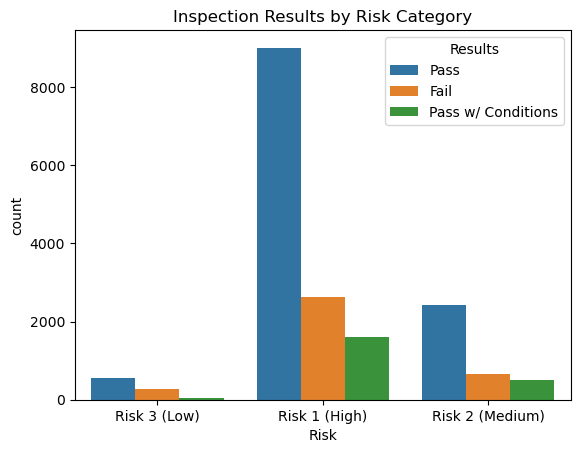

In [11]:
# view inspection results by risk category
sns.countplot(data=chicago_inspections_2011_to_2013,
               x="Risk",
               hue="Results")  
plt.title("Inspection Results by Risk Category")
plt.show()

## 2. Data Preprocessing and Cleaning

In [12]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [13]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
#y = y.replace({'Pass w/ Conditions': 'Pass'})
#lb_style = LabelBinarizer()
#y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
#y = np.where(y == 1, 0 ,1)

#I'm going to keep the target variable as is because it looks like something funky is going on and I don't want to flatten that in my results.

# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [14]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [15]:
# Initialize a Decision Tree Classifier
# ----------
dt_classifier = tree.DecisionTreeClassifier(
                       criterion='gini',              # or 'entropy' for information gain
                       splitter='best',               # or 'random' for random best split
                       max_depth=None,                # set how deep tree nodes can go
                       min_samples_split=2,           # samples (observations) needed to split node
                       min_samples_leaf=1,            # samples (observations) needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             #random seed

In [16]:
# cross_val_score returns the accuracy score by default but you can change this with the "scoring" argument
scores = cross_val_score(dt_classifier,   # specify estimator 
                         X,               # specify X
                         y,               # specify y
                         cv=5)            # number of cross validation 

In [17]:
# view accuracy
scores

array([0.89585374, 0.88667538, 0.89320705, 0.89255389, 0.88177662])

In [18]:
# Take the mean accuracy score from the results of cross validation
scores.mean()

0.8900133341777815

In [19]:
# get the shape of the data
X.shape

(15311, 41)

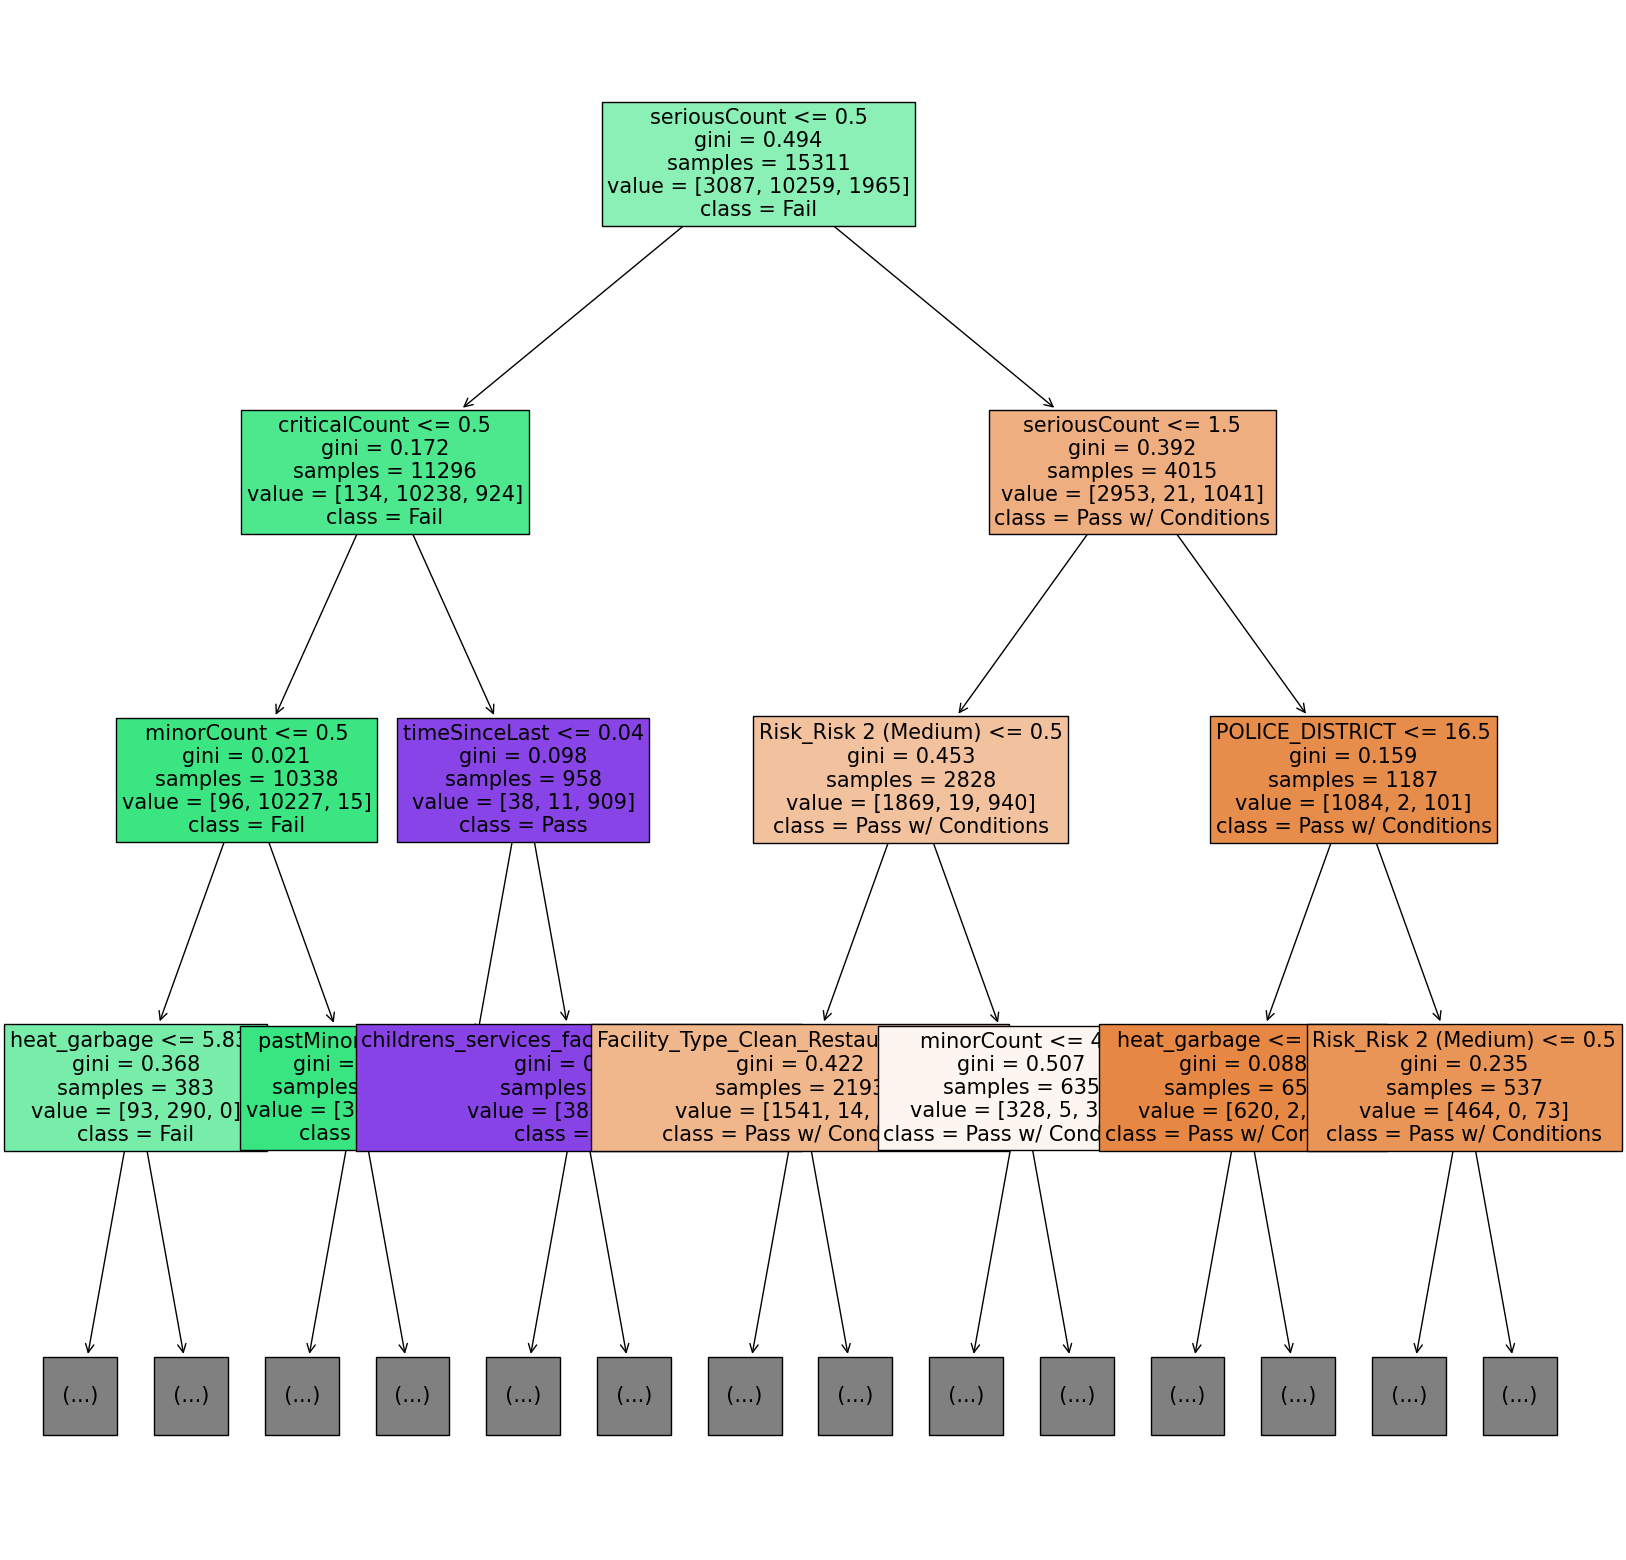

In [21]:
# fit to data
# ----------
dt_classifier.fit(X, y)

# set column names as list
column_names = X.columns.tolist()

# plot the figure
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=column_names,      # make sure its a list
                   class_names=["Pass w/ Conditions", "Fail", "Pass"],   # specify class names
                   filled=True,                     # paint nodes to indicate majority class 
                   fontsize = 15,                   # set fontsize
                   max_depth = 3)                   # set max depth of tree to view 

In [22]:
# We can use the .max_depth attribute to check out the depth of our entire tree
dt_classifier.tree_.max_depth

28

In [25]:
# Check the samples after root node
X['seriousCount'].value_counts()

seriousCount
0    11296
1     2828
2      950
3      199
4       36
5        2
Name: count, dtype: int64

In [26]:
# Getting the most informative features
# ----------
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(dt_classifier.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
1,seriousCount,0.550
0,criticalCount,0.220
28,heat_garbage,0.027
10,ageAtInspection,0.026
24,temperatureMax,0.023
25,windSpeed,0.019
29,heat_sanitation,0.019
2,minorCount,0.018
27,heat_burglary,0.017
9,POLICE_DISTRICT,0.015


### Model 1

###  Model 2

### Model 3

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [ ]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------


In [ ]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------


In [ ]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------


In [ ]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [ ]:
# data processing
# -----------

# process features
X_test2014 = chicago_inspections_2014[...]

# process target 
y_test2014 = chicago_inspections_2014[...]


In [ ]:
# predict and compare 
# -----------


In [ ]:
# evaluate
# -----------


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...